<a href="https://colab.research.google.com/github/brycemcwilliams/research-papers/blob/master/deep_learning_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain.shape

(60000, 28, 28)

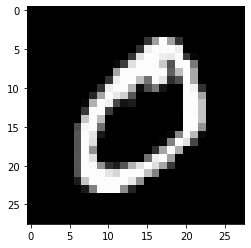

In [4]:
plt.imshow(xtrain[1,:,:],cmap='gray')

In [5]:
ytrain[1]

0

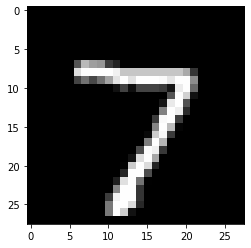

In [6]:
plt.imshow(xtest[0,:,:],cmap='gray')

In [7]:
ytrain[:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [10]:
L = pd.DataFrame(ytrain)
L[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [0]:
# Represent Training & Testing samples suitable for #tensorflow backend
x_train=xtrain.reshape(xtrain.shape[0],784).astype('float32')
x_test=xtest.reshape(xtest.shape[0],784).astype('float32')

In [12]:
x_test.shape

(10000, 784)

In [0]:
x_train/=255
x_test/=255

In [0]:
from tensorflow import keras

y_train = keras.utils.to_categorical(ytrain, 10)
y_test = keras.utils.to_categorical(ytest, 10)

In [0]:
# Initialize the constructor

model = Sequential()

In [0]:
# Define model architecture

model.add(Dense(784,activation='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1) 

Epoch 1/10
235/235 [==============================] - 4s 18ms/step - loss: 0.2680 - accuracy: 0.9252
Epoch 2/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0984 - accuracy: 0.9710
Epoch 3/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0612 - accuracy: 0.9811
Epoch 4/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0399 - accuracy: 0.9882
Epoch 5/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0307 - accuracy: 0.9904
Epoch 6/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0210 - accuracy: 0.9938
Epoch 7/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0176 - accuracy: 0.9945
Epoch 8/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0135 - accuracy: 0.9961
Epoch 9/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0080 - accuracy: 0.9978
Epoch 10/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0053 - accura

In [20]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.980
Loss: 0.079


In [0]:
y_predict = model.predict(x_test)

In [22]:
y_predict[0]

array([8.9368875e-08, 7.7339175e-09, 3.7981806e-06, 3.2977947e-05,
       3.5328327e-12, 1.8686698e-08, 4.6715474e-12, 9.9995244e-01,
       6.7293096e-09, 1.0591614e-05], dtype=float32)

In [23]:
np.argmax(y_predict[0])

7

In [24]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[ 970    1    0    1    1    1    2    1    2    1]
 [   0 1132    1    0    0    1    1    0    0    0]
 [   2    2 1012    1    1    0    3    4    6    1]
 [   0    0    3  988    0    5    1    0    4    9]
 [   0    1    2    0  968    0    5    1    0    5]
 [   1    0    0    3    0  873    4    2    7    2]
 [   2    2    1    1    4    4  944    0    0    0]
 [   1   14   12    0    3    0    0  986    2   10]
 [   3    2    2    4    4    9    3    3  939    5]
 [   2    5    0    3   11    1    0    1    0  986]]


In [25]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

